
# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Importing Libraries</p>

In [1]:
# os module to handle file paths and directories
import os
# OpenCV library for image processing tasks
import cv2
# Random module for generating random numbers
import random
# Pandas library for data manipulation and analysis
import pandas as pd
# Numpy library for numerical computations
import numpy as np
# Matplotlib library for data visualization
import matplotlib.pyplot as plt
# Seaborn library for statistical data visualization
import seaborn as sns
# TensorFlow library for building and training neural networks
import tensorflow as tf
#  Keras module from TensorFlow for building neural network models
from tensorflow import keras
# Layers module from Keras for defining different types of layers in a neural network
from tensorflow.keras import layers
# Sequential class from Keras for creating sequential neural network models
from tensorflow.keras.models import Sequential
# Specific layers from Keras for building the neural network architecture
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# TensorBoard callback from Keras for monitoring training progress
from tensorflow.keras.callbacks import TensorBoard
# Classification_report function from scikit-learn for evaluating classification models
from sklearn.metrics import classification_report

2024-11-05 13:27:46.775941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 13:27:46.776140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 13:27:46.928987: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


📄 This code defines a function called print_image_shapes which takes a list of image paths as input. It loops over each image path, reads the image using OpenCV (cv2), and if the image is successfully loaded, it prints the shape of the image. Otherwise, it prints an error message indicating that the image could not be loaded. 👀

The remaining code loads train, test, and validation data from specified directories. It retrieves the file paths and labels for each data set, and then concatenates them together to create dataframes `(df_train, df_test, df_validation)` containing the file paths and corresponding labels for each data set. 📂🔍


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Loading the Data</p>

In [3]:
import os
import pandas as pd
import cv2

def load_data(directory):

    file_paths = []
    labels = []
    
    if not os.path.exists(directory):
        print(f"Error: Directory '{directory}' does not exist.")
        return pd.DataFrame(columns=['filepath', 'label'])

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                file_paths.append(img_path)
                labels.append(label)

    if not file_paths:
        print(f"Warning: No images found in directory '{directory}'.")

    return pd.DataFrame({'filepath': file_paths, 'label': labels})

def print_image_shapes(image_paths):

    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is not None:
            print(f"Image shape for '{img_path}': {img.shape}")
        else:
            print(f"Error: Unable to load image at path: '{img_path}'.")


In [4]:
# Directories for train, test, and validation data
train_directory = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train"
test_directory = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test"
validation_directory = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation"

# Load datasets
df_train = load_data(train_directory)
df_test = load_data(test_directory)
df_validation = load_data(validation_directory)



In [15]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from typing import Optional, Tuple

# Constants for image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Define the rescaling layer
rescale = layers.Rescaling(1./255)

def load_and_rescale_dataset(directory: str, 
                             subset: Optional[str] = None, 
                             batch_size: int = BATCH_SIZE, 
                             image_size: Tuple[int, int] = IMAGE_SIZE, 
                             seed: int = 123) -> tf.data.Dataset:

    if not os.path.exists(directory):
        raise ValueError(f"Directory '{directory}' does not exist.")
    
    dataset = keras.utils.image_dataset_from_directory(
        directory=directory,
        batch_size=batch_size,
        image_size=image_size,
        validation_split=0.2,
        subset=subset,
        seed=seed,
        label_mode='categorical'  # Assuming you have multiple classes
    )
    
    return dataset.map(lambda x, y: (rescale(x), y))  # Apply rescaling

# Load the training dataset
train_ds = load_and_rescale_dataset(
    directory='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train',
    subset="training"
)

# Load the validation dataset
validation_ds = load_and_rescale_dataset(
    directory='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation',
    subset="validation"
)

# Load the test dataset without validation split
test_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    label_mode='categorical',  # Assuming you have multiple classes
    shuffle=False
)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling

# Output detailed information about datasets
def print_dataset_info(dataset: tf.data.Dataset, dataset_name: str):
    """Prints detailed information about the dataset."""
    num_batches = dataset.cardinality()
    sample_images, sample_labels = next(iter(dataset))
    sample_shape = sample_images.shape  # Shape of the image batch
    sample_labels_shape = sample_labels.shape  # Shape of the label batch
    
    print(f"{dataset_name} dataset: {num_batches} batches")
    print(f"Sample batch shape: {sample_shape}")
    print(f"Sample labels shape: {sample_labels_shape}")



Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 800 files belonging to 2 classes.
Using 160 files for validation.
Found 992 files belonging to 2 classes.


In [16]:
# Output detailed information about datasets
def print_dataset_info(dataset: tf.data.Dataset, dataset_name: str):
    """Prints detailed information about the dataset."""
    num_batches = dataset.cardinality()
    sample_images, sample_labels = next(iter(dataset))
    sample_shape = sample_images.shape  # Shape of the image batch
    sample_labels_shape = sample_labels.shape  # Shape of the label batch
    
    print(f"{dataset_name} dataset: {num_batches} batches")
    print(f"Sample batch shape: {sample_shape}")
    print(f"Sample labels shape: {sample_labels_shape}")

print_dataset_info(train_ds, "Training")
print_dataset_info(validation_ds, "Validation")
print_dataset_info(test_ds, "Test")


Training dataset: 250 batches
Sample batch shape: (32, 224, 224, 3)
Sample labels shape: (32, 2)
Validation dataset: 5 batches
Sample batch shape: (32, 224, 224, 3)
Sample labels shape: (32, 2)
Test dataset: 31 batches
Sample batch shape: (32, 224, 224, 3)
Sample labels shape: (32, 2)


Rescaling layer is defined using layers.Rescaling from Keras. It scales the pixel values of the images in the datasets to the range `[0, 1]`. ✨

The code then loads the train, validation, and test datasets from their respective directories using keras.utils.image_dataset_from_directory. The datasets are configured with batch size of `32`, image size of `(224, 224)`, and label mode set to 'binary' (assuming there are multiple classes). The train and validation datasets are further split into training and validation subsets based on the specified validation split ratio.

After loading the datasets, the rescaling layer is applied to each dataset using the map function, which rescales the pixel values of the images in the datasets. 🔄


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Visualizing Train Images</p>

Creates `8` images with mask and `8` without mask a figure with 4x4 subplots.
It loops through the sampled images with masks, reads each image using OpenCV (cv2), converts the image to RGB color space, and displays the image in the corresponding subplot with a title indicating `"With Mask"` and `"Without Mask"`.

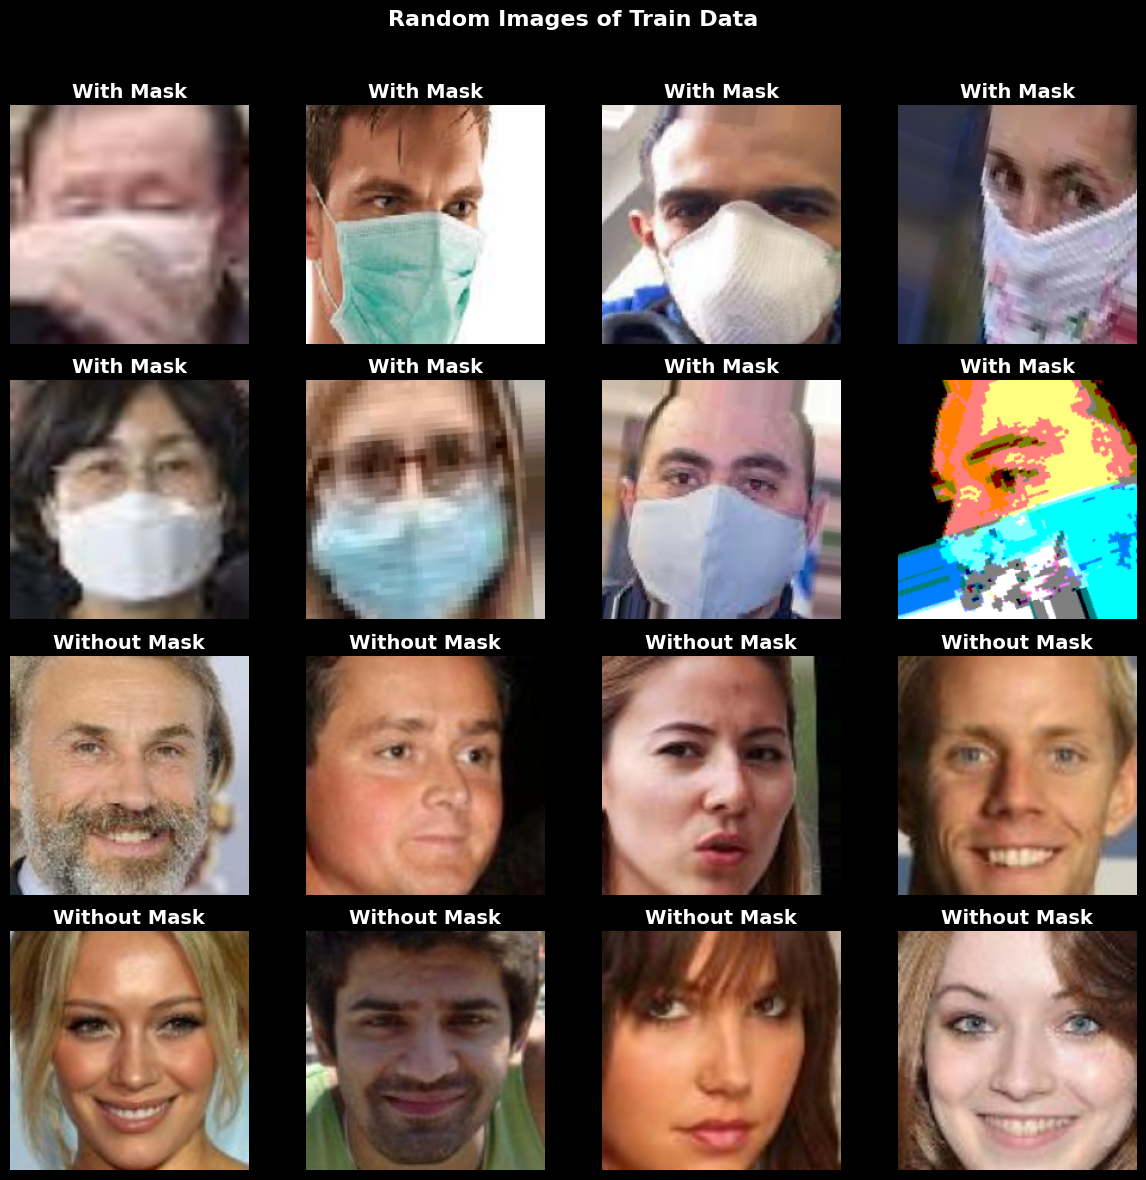

In [74]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Directory paths for images with mask and without mask
with_mask_path = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask"
without_mask_path = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask"

# Function to sample images from a directory
def sample_images(directory, num_samples):
    images = [os.path.join(directory, file) for file in os.listdir(directory)]
    return random.sample(images, min(num_samples, len(images)))

# Sample images from each category
with_mask_img_paths = sample_images(with_mask_path, 8)
without_mask_img_paths = sample_images(without_mask_path, 8)

# Load and display images in subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12), facecolor='black')  # Larger figure with black background

# Loop through images with mask
for i, img_path in enumerate(with_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    img = cv2.resize(img, (200, 200))  # Resize images for better display
    axes[i//4, i%4].imshow(img)
    axes[i//4, i%4].set_title("With Mask", color='white', fontsize=14, fontweight='bold')  # White title
    axes[i//4, i%4].axis('off')

# Loop through images without mask
for i, img_path in enumerate(without_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    img = cv2.resize(img, (200, 200))  # Resize images for better display
    axes[2+i//4, i%4].imshow(img)
    axes[2+i//4, i%4].set_title("Without Mask", color='white', fontsize=14, fontweight='bold')  # White title
    axes[2+i//4, i%4].axis('off')

plt.suptitle('Random Images of Train Data', color='white', fontsize=16, fontweight='bold')  # White overall title
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust layout to make space for the overall title
plt.show()


An input layer is defined with a shape of `(224, 224, 3)` .
A sequential model is defined consisting of multiple layers: three convolutional layers with `32` filters and `3x3` kernel size, followed by `max pooling` layers; a `flatten layer` to convert the 2D data to 1D; a dropout layer with a dropout rate of 0.5; and an output layer with 1 unit and `softmax` activation.

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Count of Train Label</p>

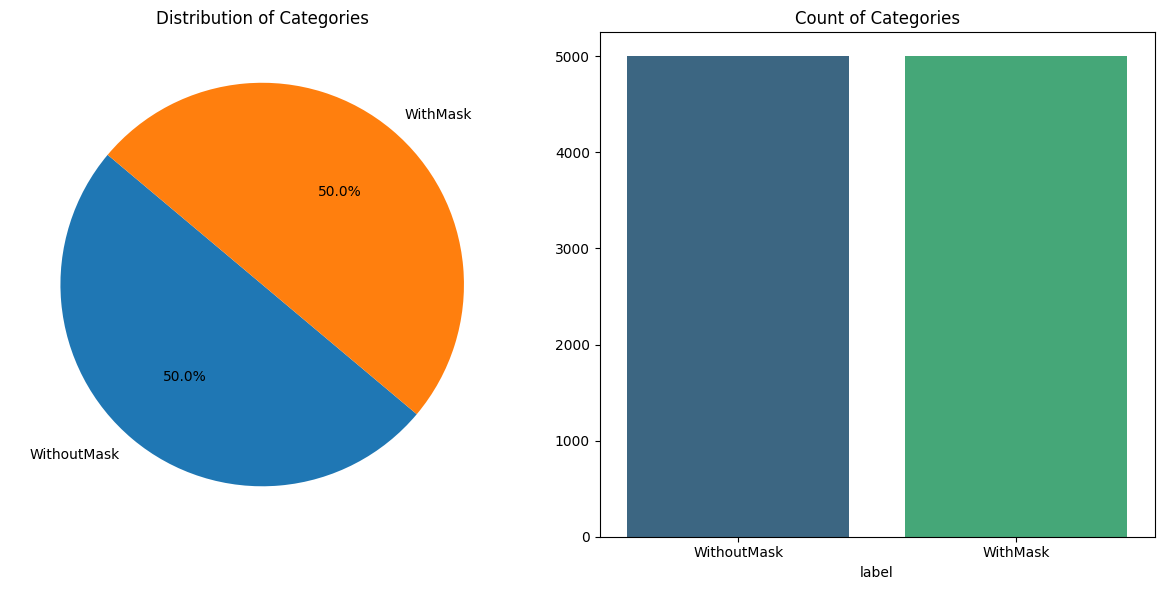

In [18]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Count of Test Label</p>


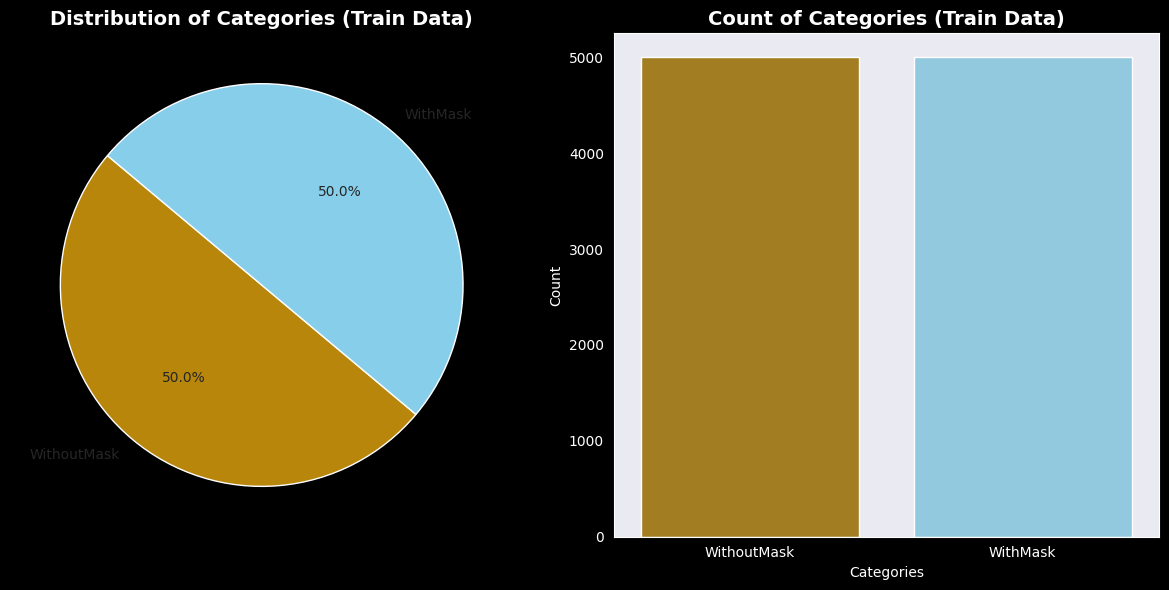

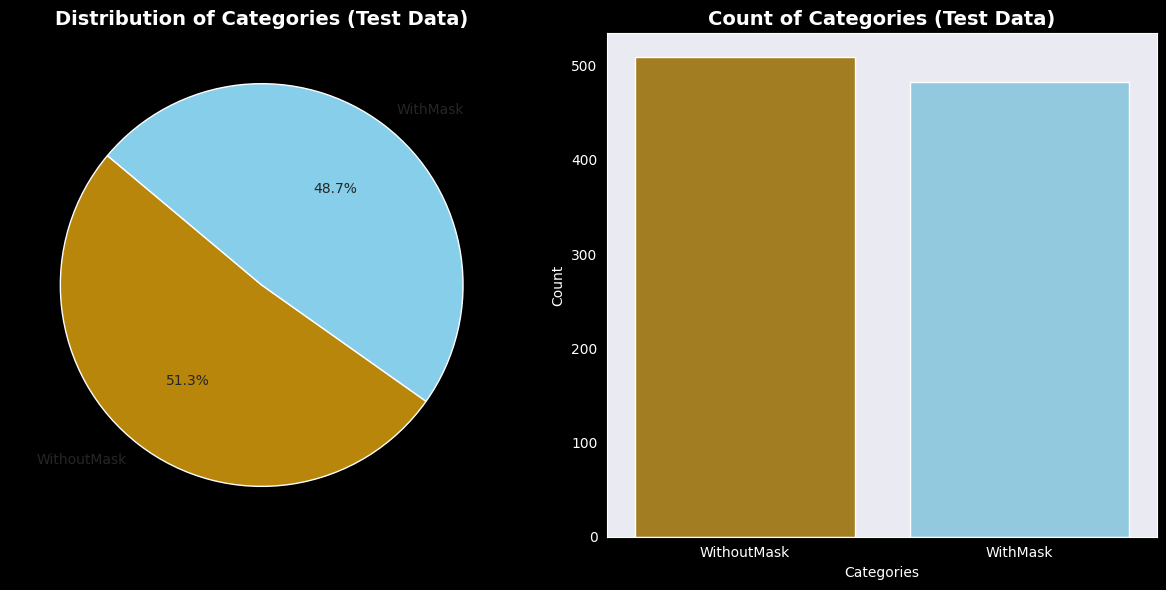

In [88]:
# Count the occurrences of each category in the 'label' column for train data
count_train = df_train['label'].value_counts()

# Create a figure with two subplots for train data
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')  # Set black background

# Define the color palette for gold and black
gold_palette = [ 'darkgoldenrod',  'skyblue']

# Plot pie chart on the first subplot for train data
axs[0].pie(count_train, labels=count_train.index, autopct='%1.1f%%', startangle=140, colors=gold_palette)
axs[0].set_title('Distribution of Categories (Train Data)', color='white', fontsize=14, fontweight='bold')  # White title

# Plot bar chart on the second subplot for train data
sns.barplot(x=count_train.index, y=count_train.values, ax=axs[1], palette=gold_palette)
axs[1].set_title('Count of Categories (Train Data)', color='white', fontsize=14, fontweight='bold')  # White title
axs[1].set_xlabel('Categories', color='white')  # White x-axis label
axs[1].set_ylabel('Count', color='white')  # White y-axis label
axs[1].tick_params(axis='x', colors='white')  # White x-axis tick labels
axs[1].tick_params(axis='y', colors='white')  # White y-axis tick labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Count the occurrences of each category in the 'label' column for test data
count_test = df_test['label'].value_counts()

# Create a figure with two subplots for test data
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')  # Set black background

# Plot pie chart on the first subplot for test data
axs[0].pie(count_test, labels=count_test.index, autopct='%1.1f%%', startangle=140, colors=gold_palette)
axs[0].set_title('Distribution of Categories (Test Data)', color='white', fontsize=14, fontweight='bold')  # White title

# Plot bar chart on the second subplot for test data
sns.barplot(x=count_test.index, y=count_test.values, ax=axs[1], palette=gold_palette)
axs[1].set_title('Count of Categories (Test Data)', color='white', fontsize=14, fontweight='bold')  # White title
axs[1].set_xlabel('Categories', color='white')  # White x-axis label
axs[1].set_ylabel('Count', color='white')  # White y-axis label
axs[1].tick_params(axis='x', colors='white')  # White x-axis tick labels
axs[1].tick_params(axis='y', colors='white')  # White y-axis tick labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Build the Model</p>

In [45]:
import tensorflow as tf

# Define input layer
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Define model architecture
model1 = tf.keras.models.Sequential([
    input_layer,
    # First convolutional block
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    
    # Second convolutional block
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    
    # Third convolutional block
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    
    # Fourth convolutional block
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    
    # Flatten layer to convert 2D data to 1D
    tf.keras.layers.Flatten(),
    
    # Dropout Layer
    tf.keras.layers.Dropout(0.5),
    
    # Dense layer for classification
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # Output layer with softmax activation for binary classification
    tf.keras.layers.Dense(2, activation='softmax'),
])

model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,961,602 (18.93 MB)

 Trainable params: 4,960,898 (18.92 MB)

 Non-trainable params: 704 (2.75 KB)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Summary of Model</p>

The model is compiled with the `Adam optimizer`, `categorical cross-entropy` loss function, and accuracy metric. This prepares the model for training by specifying the optimization algorithm, the loss function to minimize during training, and the metric to evaluate the model's performance.


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Compile the Model</p>

In [46]:
# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

EarlyStopping callback is defined with a patience of `5` and restore_best_weights set to True. The model is then trained using the fit() function with the specified training and validation datasets, for a total of `5` epochs. The EarlyStopping callback is included as a callback during training to monitor the validation loss and control early stopping behavior, and the training history is stored in the history variable.


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Fit the Model</p>

In [42]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    'best_mo.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)


In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# Define a custom callback for logging epoch results
class DetailedLoggingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\n\nEpoch {epoch + 1}/{self.params['epochs']}")
        print(f" - Training Loss: {logs['loss']:.4f}")
        print(f" - Training Accuracy: {logs['accuracy']:.4f}")
        print(f" - Validation Loss: {logs['val_loss']:.4f}")
        print(f" - Validation Accuracy: {logs['val_accuracy']:.4f}")
        print("=" * 50)  # Separator line for readability


In [52]:
# Fit the model with the detailed logging callback
history = model1.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=6,
    callbacks=[early_stopping, model_checkpoint, DetailedLoggingCallback()],
    verbose=1  # Disable the default progress output
)


Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9343 - loss: 0.7397

Epoch 1/6
 - Training Loss: 0.4384
 - Training Accuracy: 0.9590
 - Validation Loss: 0.2283
 - Validation Accuracy: 0.9187
250/250 ━━━━━━━━━━━━━━━━━━━━ 760s 3s/step - accuracy: 0.9344 - loss: 0.7385 - val_accuracy: 0.9187 - val_loss: 0.2283
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9785 - loss: 0.2228

Epoch 2/6
 - Training Loss: 0.2135
 - Training Accuracy: 0.9772
 - Validation Loss: 0.6155
 - Validation Accuracy: 0.9375
250/250 ━━━━━━━━━━━━━━━━━━━━ 705s 3s/step - accuracy: 0.9785 - loss: 0.2227 - val_accuracy: 0.9375 - val_loss: 0.6155
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9836 - loss: 0.1240

Epoch 3/6
 - Training Loss: 0.1058
 - Training Accuracy: 0.9847
 - Validation Loss: 0.0389
 - Validation Accuracy: 0.9875
250/250 ━━━━━━━━━━━━━━━━━━━━ 744s 3s/step - accuracy: 0.9836 - loss: 0.1239 - val_accuracy: 0.9875 - val_loss: 0.0389
Epoch 4/6
250/250 ━━━━━━━



# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">Evaluate the Model</p>


In [53]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model1.evaluate(test_ds)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 595ms/step - accuracy: 0.9688 - loss: 0.3018
Test Loss: 0.3662170171737671
Test Accuracy: 0.9717742204666138


In [54]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate the model on the test dataset
test_loss, test_accuracy = model1.evaluate(test_ds)
print(f"\n\033[1mTest Loss:\033[0m {test_loss:.4f}")
print(f"\033[1mTest Accuracy:\033[0m {test_accuracy:.4f}")

# Generate predictions for the test dataset
y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model1.predict(images)
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())
    y_true.extend(tf.argmax(labels, axis=1).numpy())

# Classification Report
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_true, y_pred))




31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 579ms/step - accuracy: 0.9688 - loss: 0.3018

Test Loss: 0.3662
Test Accuracy: 0.9718
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

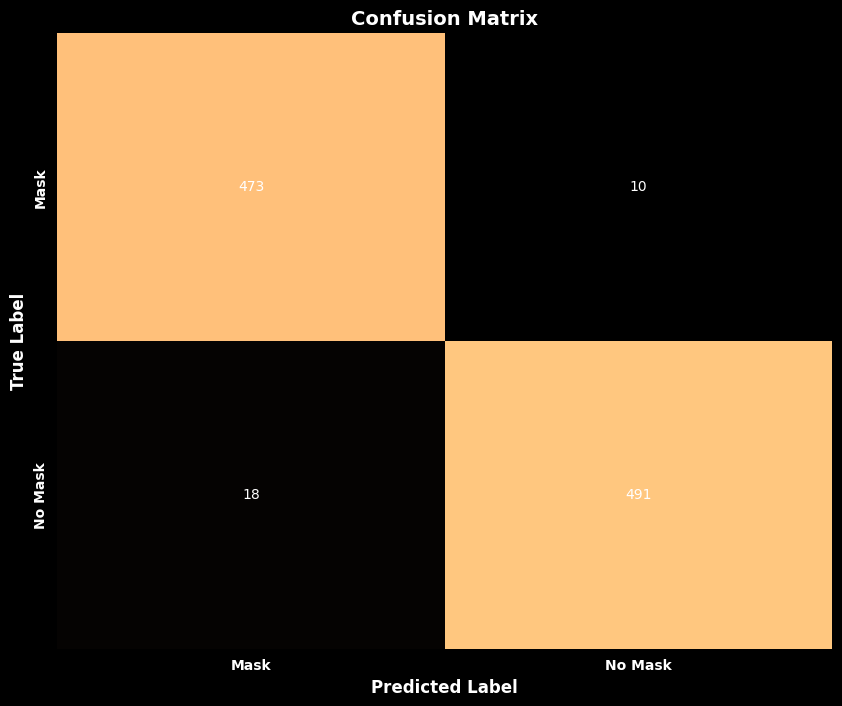

In [68]:
# Define class names manually
class_names = ['Mask', 'No Mask']  # Replace with actual class names

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot with detailed styling
plt.figure(figsize=(10, 8), facecolor='black')
sns.set_style("dark")

# Plot heatmap with custom colors and style
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='copper',  # Copper for gold-like tone
            xticklabels=class_names, yticklabels=class_names, cbar=False, 
            annot_kws={"color": "white"})  # White annotation text for clarity

# Labels and title
plt.xlabel("Predicted Label", fontweight='bold', color='white', fontsize=12)
plt.ylabel("True Label", fontweight='bold', color='white', fontsize=12)
plt.title("Confusion Matrix", fontweight='bold', color='white', fontsize=14)

# Modify tick colors and background color
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')
plt.gca().set_facecolor("black")  # Set black background color
plt.grid(False)  # Remove gridlines for a cleaner look

plt.show()

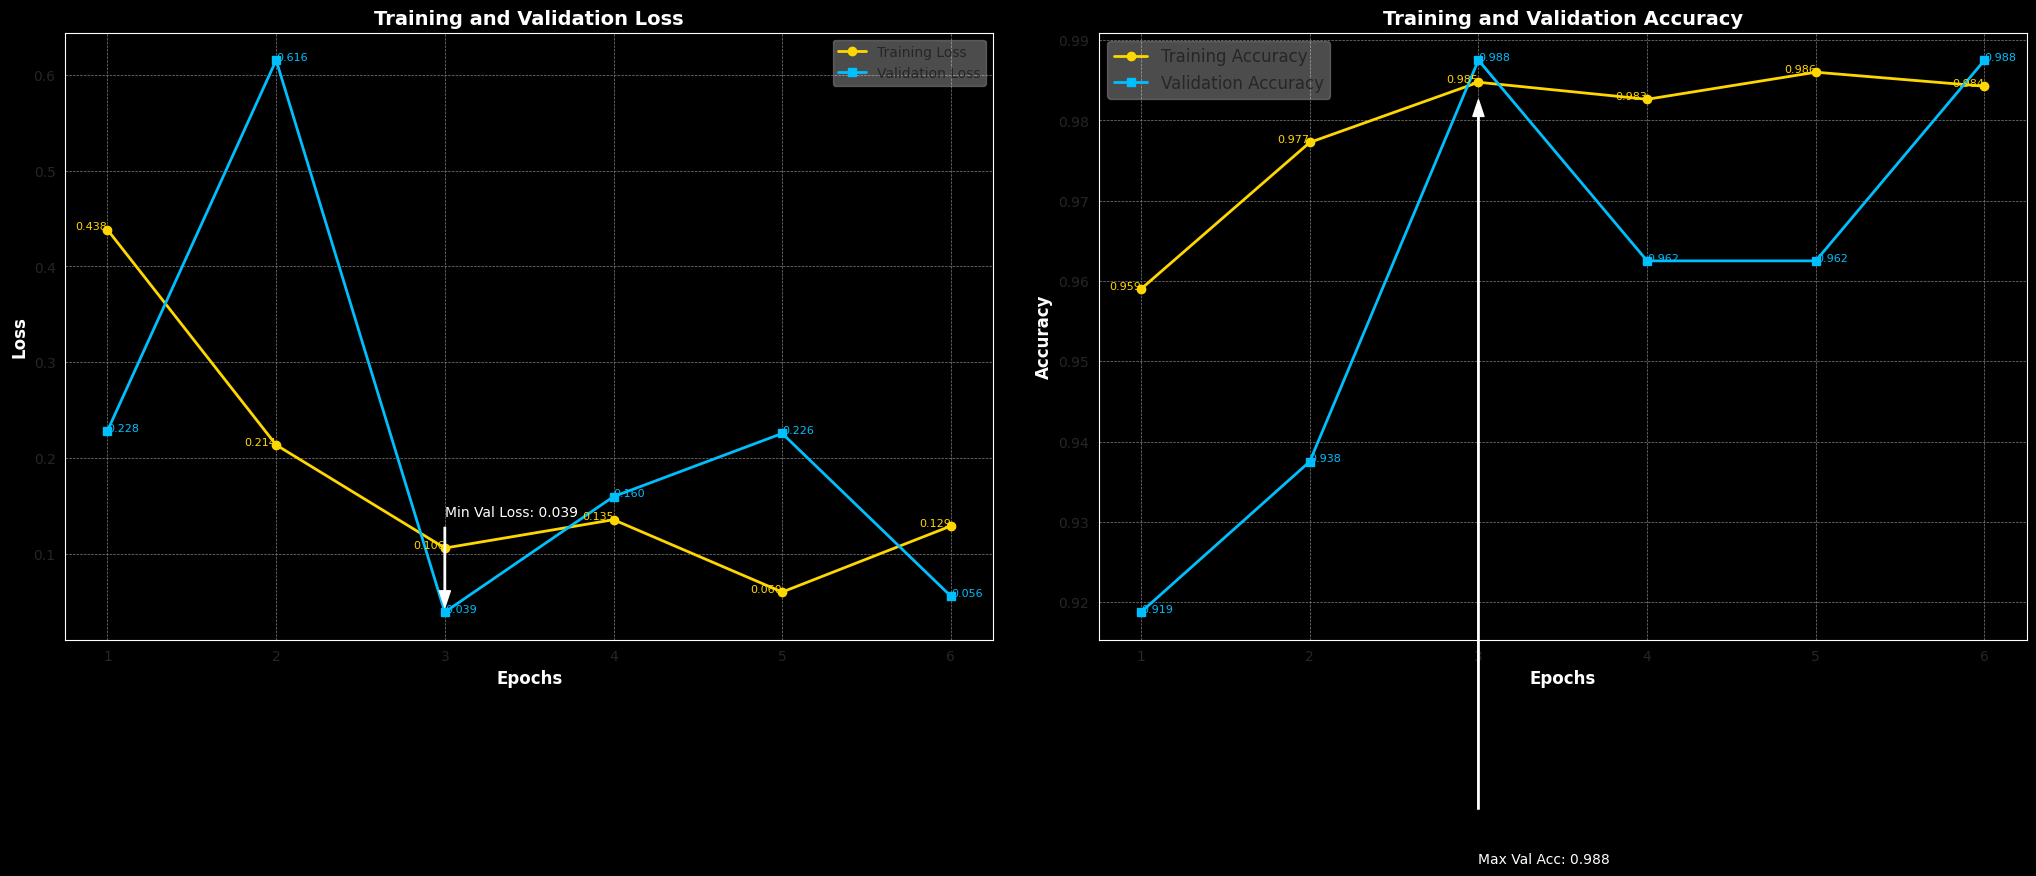

In [67]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    epochs = range(1, len(history.history['loss']) + 1)

    # Set up the figure with a black background
    plt.figure(figsize=(21, 10), facecolor='black')

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'o-', color='#FFD700', label='Training Loss', linewidth=2, markersize=6)
    plt.plot(epochs, history.history['val_loss'], 's-', color='#00BFFF', label='Validation Loss', linewidth=2, markersize=6)
    plt.title('Training and Validation Loss', fontweight='bold', color='white', fontsize=14)
    plt.xlabel('Epochs', fontweight='bold', color='white', fontsize=12)
    plt.ylabel('Loss', fontweight='bold', color='white', fontsize=12)
    plt.legend(loc='best', facecolor="white", framealpha=0.3, fontsize=10)
    plt.gca().set_facecolor("black")
    plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

    # Annotate each data point with the exact values
    for i, (train_loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
        plt.text(epochs[i], train_loss, f'{train_loss:.3f}', color='#FFD700', ha='right', fontsize=8)
        plt.text(epochs[i], val_loss, f'{val_loss:.3f}', color='#00BFFF', ha='left', fontsize=8)

    # Highlight the minimum validation loss point
    min_val_loss = min(history.history['val_loss'])
    min_val_loss_epoch = history.history['val_loss'].index(min_val_loss) + 1
    plt.annotate(f'Min Val Loss: {min_val_loss:.3f}', xy=(min_val_loss_epoch, min_val_loss),
                 xytext=(min_val_loss_epoch, min_val_loss + 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'o-', color='#FFD700', label='Training Accuracy', linewidth=2, markersize=6)
    plt.plot(epochs, history.history['val_accuracy'], 's-', color='#00BFFF', label='Validation Accuracy', linewidth=2, markersize=6)
    plt.title('Training and Validation Accuracy', fontweight='bold', color='white', fontsize=14)
    plt.xlabel('Epochs', fontweight='bold', color='white', fontsize=12)
    plt.ylabel('Accuracy', fontweight='bold', color='white', fontsize=12)
    plt.legend(loc='best', facecolor="white", framealpha=0.3, fontsize=12)
    plt.gca().set_facecolor("black")
    plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

    # Annotate each data point with the exact values
    for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy'])):
        plt.text(epochs[i], train_acc, f'{train_acc:.3f}', color='#FFD700', ha='right', fontsize=8)
        plt.text(epochs[i], val_acc, f'{val_acc:.3f}', color='#00BFFF', ha='left', fontsize=8)

    # Highlight the maximum validation accuracy point
    max_val_acc = max(history.history['val_accuracy'])
    max_val_acc_epoch = history.history['val_accuracy'].index(max_val_acc) + 1
    plt.annotate(f'Max Val Acc: {max_val_acc:.3f}', xy=(max_val_acc_epoch, max_val_acc),
                 xytext=(max_val_acc_epoch, max_val_acc - 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    plt.tight_layout(pad=3)
    plt.show()

# Call the function to plot
plot_training_history(history)


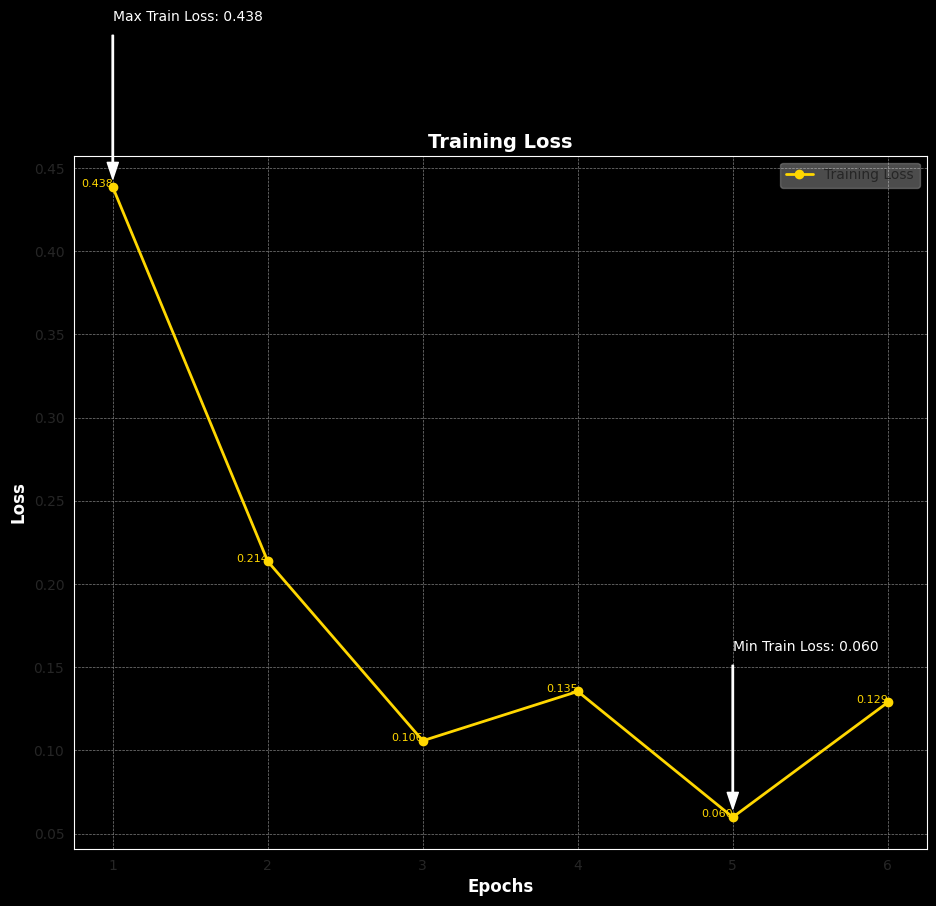

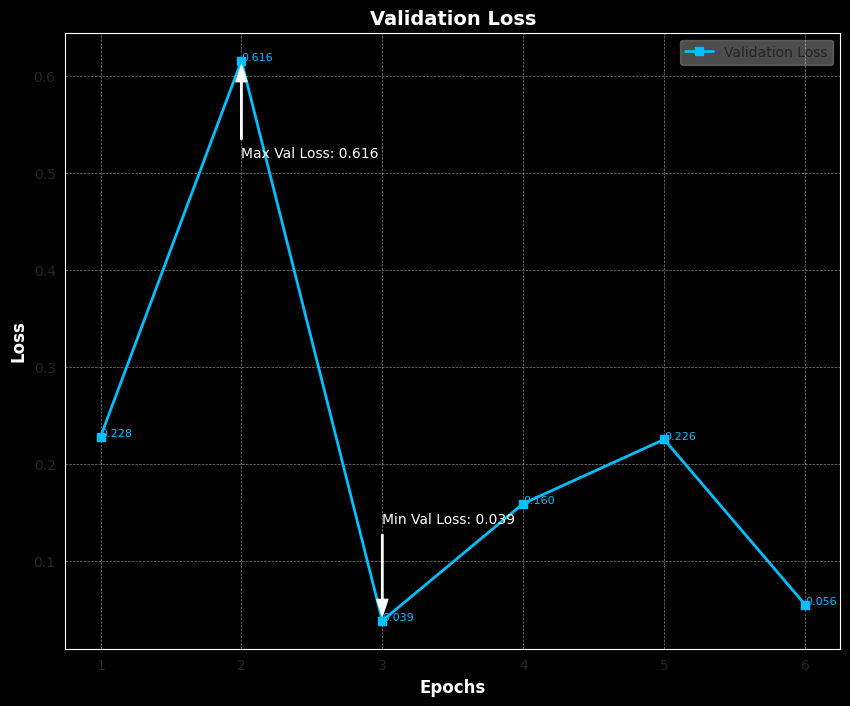

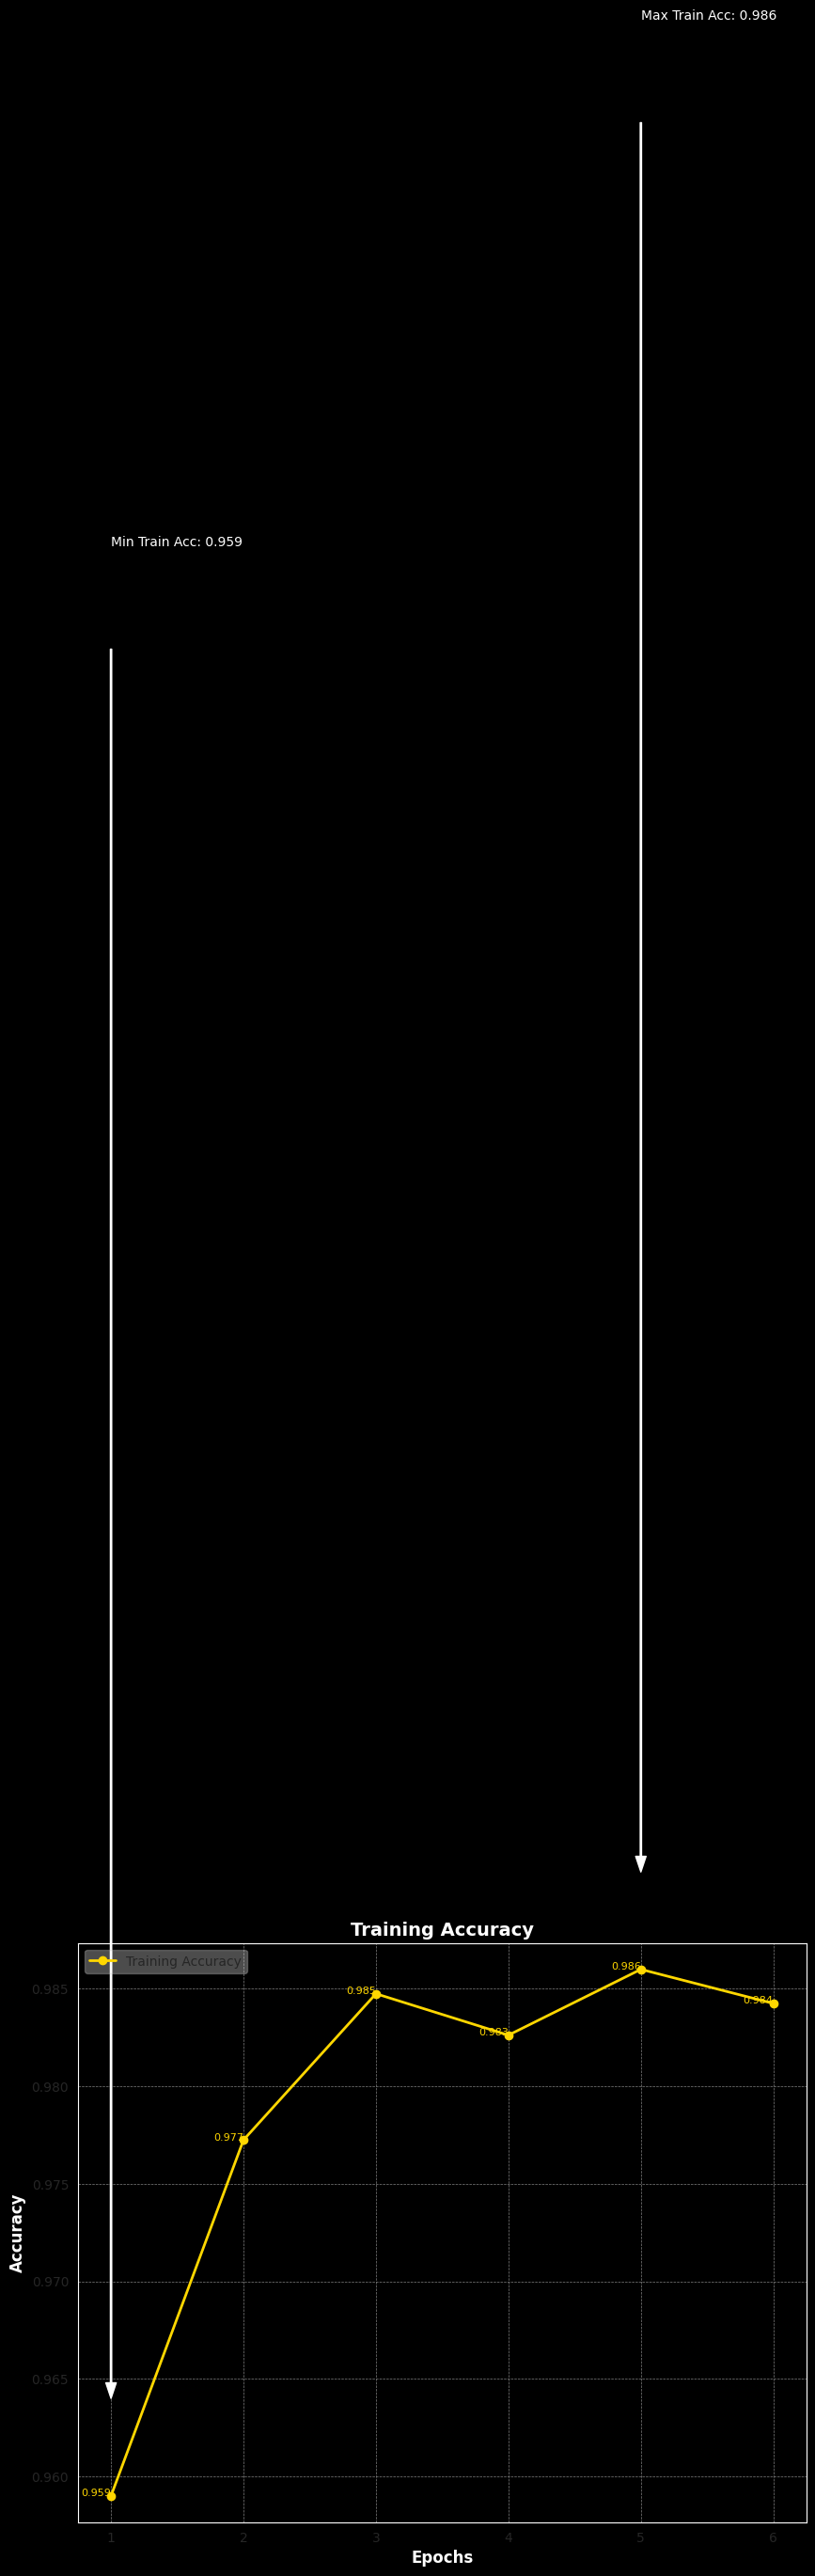

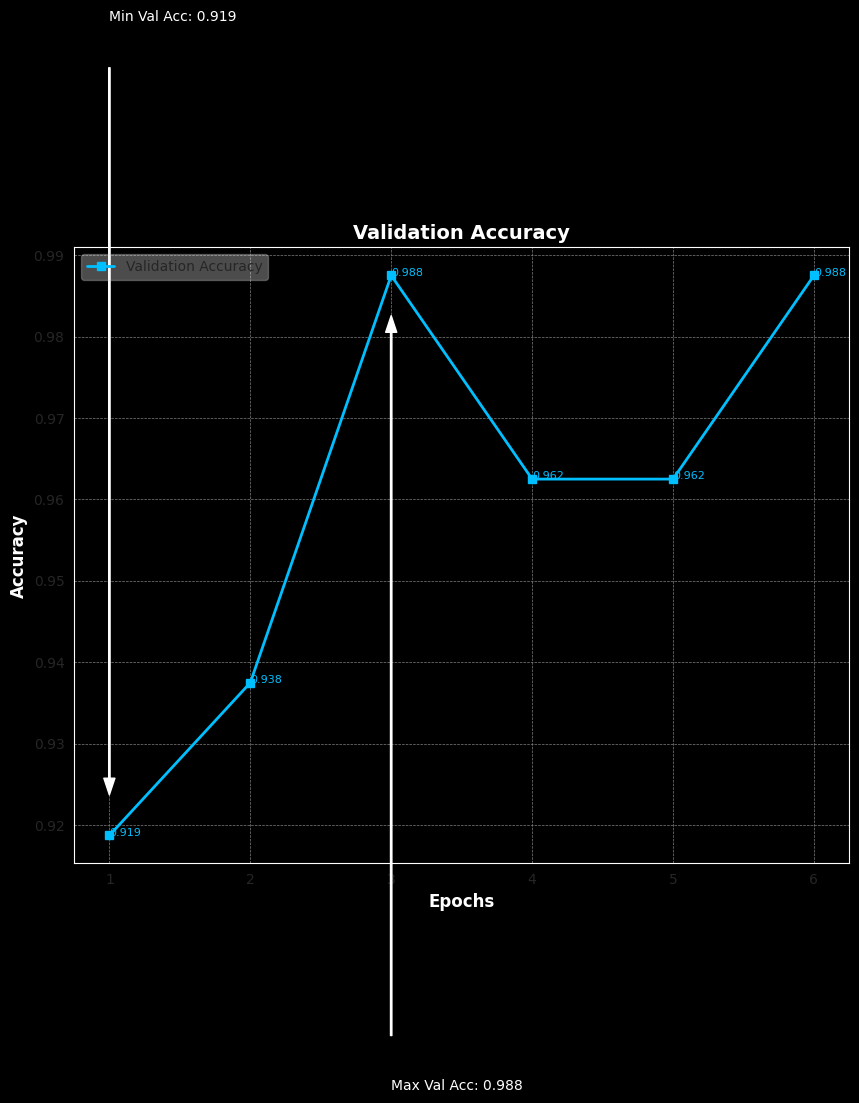

In [73]:
import matplotlib.pyplot as plt

def plot_detailed_training_history(history):
    epochs = range(1, len(history.history['loss']) + 1)

    # Plot Training Loss
    plt.figure(figsize=(11, 9), facecolor='black')
    plt.plot(epochs, history.history['loss'], 'o-', color='#FFD700', label='Training Loss', linewidth=2, markersize=6)
    plt.title('Training Loss', fontweight='bold', color='white', fontsize=14)
    plt.xlabel('Epochs', fontweight='bold', color='white', fontsize=12)
    plt.ylabel('Loss', fontweight='bold', color='white', fontsize=12)
    plt.legend(loc='best', facecolor="white", framealpha=0.3, fontsize=10)
    plt.gca().set_facecolor("black")
    plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

    # Annotate training loss data points
    for i, train_loss in enumerate(history.history['loss']):
        plt.text(epochs[i], train_loss, f'{train_loss:.3f}', color='#FFD700', ha='right', fontsize=8)

    # Highlight the maximum and minimum training loss
    max_train_loss = max(history.history['loss'])
    max_train_loss_epoch = history.history['loss'].index(max_train_loss) + 1
    plt.annotate(f'Max Train Loss: {max_train_loss:.3f}', xy=(max_train_loss_epoch, max_train_loss),
                 xytext=(max_train_loss_epoch, max_train_loss + 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    min_train_loss = min(history.history['loss'])
    min_train_loss_epoch = history.history['loss'].index(min_train_loss) + 1
    plt.annotate(f'Min Train Loss: {min_train_loss:.3f}', xy=(min_train_loss_epoch, min_train_loss),
                 xytext=(min_train_loss_epoch, min_train_loss + 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    plt.show()

    # Plot Validation Loss
    plt.figure(figsize=(10, 8), facecolor='black')
    plt.plot(epochs, history.history['val_loss'], 's-', color='#00BFFF', label='Validation Loss', linewidth=2, markersize=6)
    plt.title('Validation Loss', fontweight='bold', color='white', fontsize=14)
    plt.xlabel('Epochs', fontweight='bold', color='white', fontsize=12)
    plt.ylabel('Loss', fontweight='bold', color='white', fontsize=12)
    plt.legend(loc='best', facecolor="white", framealpha=0.3, fontsize=10)
    plt.gca().set_facecolor("black")
    plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

    # Annotate validation loss data points
    for i, val_loss in enumerate(history.history['val_loss']):
        plt.text(epochs[i], val_loss, f'{val_loss:.3f}', color='#00BFFF', ha='left', fontsize=8)

    # Highlight minimum and maximum validation loss
    min_val_loss = min(history.history['val_loss'])
    min_val_loss_epoch = history.history['val_loss'].index(min_val_loss) + 1
    plt.annotate(f'Min Val Loss: {min_val_loss:.3f}', xy=(min_val_loss_epoch, min_val_loss),
                 xytext=(min_val_loss_epoch, min_val_loss + 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)
    
    max_val_loss = max(history.history['val_loss'])
    max_val_loss_epoch = history.history['val_loss'].index(max_val_loss) + 1
    plt.annotate(f'Max Val Loss: {max_val_loss:.3f}', xy=(max_val_loss_epoch, max_val_loss),
                 xytext=(max_val_loss_epoch, max_val_loss - 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    plt.show()

    # Plot Training Accuracy
    plt.figure(figsize=(10, 8), facecolor='black')
    plt.plot(epochs, history.history['accuracy'], 'o-', color='#FFD700', label='Training Accuracy', linewidth=2, markersize=6)
    plt.title('Training Accuracy', fontweight='bold', color='white', fontsize=14)
    plt.xlabel('Epochs', fontweight='bold', color='white', fontsize=12)
    plt.ylabel('Accuracy', fontweight='bold', color='white', fontsize=12)
    plt.legend(loc='best', facecolor="white", framealpha=0.3, fontsize=10)
    plt.gca().set_facecolor("black")
    plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

    # Annotate training accuracy data points
    for i, train_acc in enumerate(history.history['accuracy']):
        plt.text(epochs[i], train_acc, f'{train_acc:.3f}', color='#FFD700', ha='right', fontsize=8)

    # Highlight minimum and maximum training accuracy
    min_train_acc = min(history.history['accuracy'])
    min_train_acc_epoch = history.history['accuracy'].index(min_train_acc) + 1
    plt.annotate(f'Min Train Acc: {min_train_acc:.3f}', xy=(min_train_acc_epoch, min_train_acc),
                 xytext=(min_train_acc_epoch, min_train_acc + 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    max_train_acc = max(history.history['accuracy'])
    max_train_acc_epoch = history.history['accuracy'].index(max_train_acc) + 1
    plt.annotate(f'Max Train Acc: {max_train_acc:.3f}', xy=(max_train_acc_epoch, max_train_acc),
                 xytext=(max_train_acc_epoch, max_train_acc + 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    plt.show()

    # Plot Validation Accuracy
    plt.figure(figsize=(10, 8), facecolor='black')
    plt.plot(epochs, history.history['val_accuracy'], 's-', color='#00BFFF', label='Validation Accuracy', linewidth=2, markersize=6)
    plt.title('Validation Accuracy', fontweight='bold', color='white', fontsize=14)
    plt.xlabel('Epochs', fontweight='bold', color='white', fontsize=12)
    plt.ylabel('Accuracy', fontweight='bold', color='white', fontsize=12)
    plt.legend(loc='best', facecolor="white", framealpha=0.3, fontsize=10)
    plt.gca().set_facecolor("black")
    plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

    # Annotate validation accuracy data points
    for i, val_acc in enumerate(history.history['val_accuracy']):
        plt.text(epochs[i], val_acc, f'{val_acc:.3f}', color='#00BFFF', ha='left', fontsize=8)

    # Highlight maximum and minimum validation accuracy
    max_val_acc = max(history.history['val_accuracy'])
    max_val_acc_epoch = history.history['val_accuracy'].index(max_val_acc) + 1
    plt.annotate(f'Max Val Acc: {max_val_acc:.3f}', xy=(max_val_acc_epoch, max_val_acc),
                 xytext=(max_val_acc_epoch, max_val_acc - 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)

    min_val_acc = min(history.history['val_accuracy'])
    min_val_acc_epoch = history.history['val_accuracy'].index(min_val_acc) + 1
    plt.annotate(f'Min Val Acc: {min_val_acc:.3f}', xy=(min_val_acc_epoch, min_val_acc),
                 xytext=(min_val_acc_epoch, min_val_acc + 0.1),
                 arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8), color='white', fontsize=10)
    
    plt.show()

# Call the function to plot each metric separately with additional annotations
plot_detailed_training_history(history)


In [51]:
import tensorflow as tf

# Load the saved model
model_path = '/kaggle/working/best_mo.keras' # Adjust path as necessary
loaded_model = tf.keras.models.load_model(model_path)

# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_ds)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 584ms/step - accuracy: 0.9856 - loss: 0.0852
Test Loss: 0.14776822924613953
Test Accuracy: 0.9697580933570862


In [127]:
import tensorflow as tf

# Load the saved model
model_path = '/kaggle/working/best_mo.keras' # Adjust path as necessary
loaded_model = tf.keras.models.load_model(model_path)

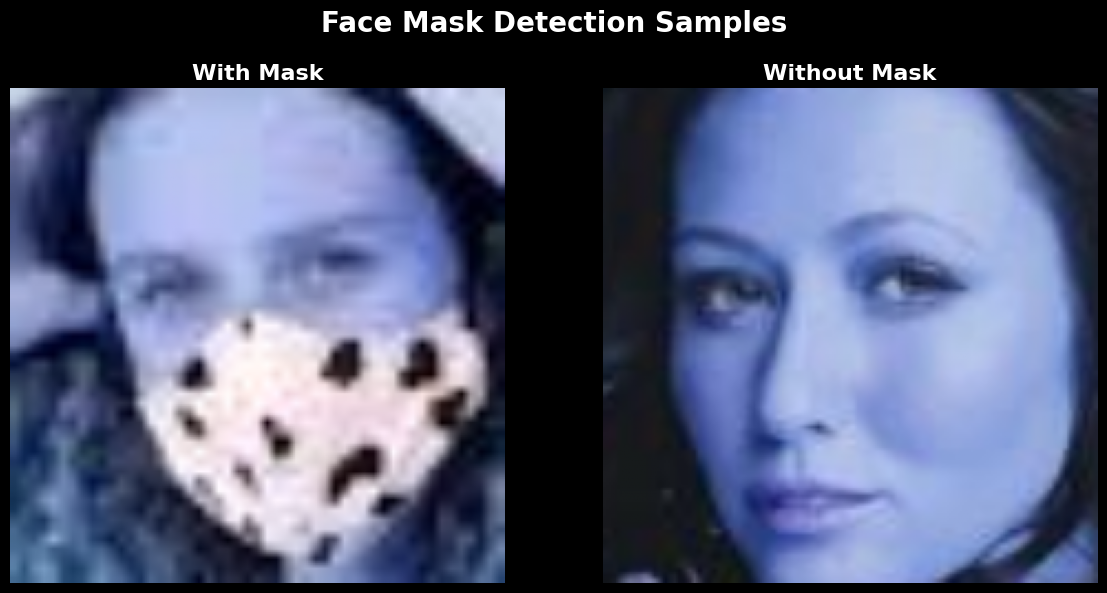

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, size=(224, 224)):
    """
    Load and preprocess the image.
    
    Parameters:
    - image_path: str, path to the image file
    - size: tuple, size to resize the image
    
    Returns:
    - image: numpy array, preprocessed image
    """
    # Load image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the path.")
    
    # Resize image
    image = cv2.resize(image, size)
    
    # Normalize image
    image = image / 255.0  # Scale pixel values to [0, 1]
    
    return image

def display_image(image, title, ax):
    """
    Display the image with a title.
    
    Parameters:
    - image: numpy array, image to display
    - title: str, title of the image
    - ax: matplotlib axis object
    """
    ax.imshow(image)
    ax.set_title(title, color='white', fontsize=16, fontweight='bold')
    ax.axis('off')  # Hide axes

# Paths to the sample images
with_mask_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1821.png'
without_mask_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1014.png'

# Load and preprocess images
try:
    sample_mask_img = load_and_preprocess_image(with_mask_path)
    sample_without_mask_img = load_and_preprocess_image(without_mask_path)
except ValueError as e:
    print(e)
    exit()

# Create a figure for displaying images
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')

# Display images
display_image(sample_mask_img, "With Mask", axs[0])
display_image(sample_without_mask_img, "Without Mask", axs[1])

# Adjust layout
plt.suptitle('Face Mask Detection Samples', color='white', fontsize=20, fontweight='bold')  # Main title
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


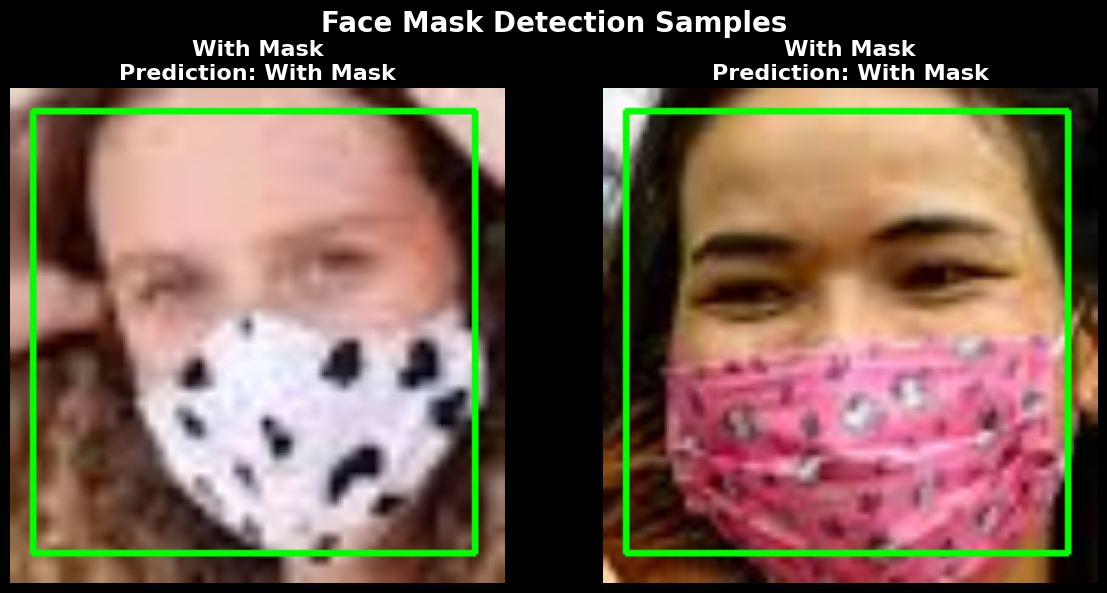

In [110]:
# Function to detect if a mask is present
def is_mask_present(prediction):
    return np.argmax(prediction) == 0  # Assuming index 1 is 'With Mask'

# Paths to the sample images
with_mask_path1 = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1821.png'
with_mask_path2 = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1203.png'

# Load and preprocess images
try:
    sample_mask_img1 = load_and_preprocess_image(with_mask_path1)
    sample_mask_img2 = load_and_preprocess_image(with_mask_path2)
except ValueError as e:
    print(e)
    exit()

# Make predictions
pred_mask1 = model.predict(sample_mask_img1)
pred_mask2 = model.predict(sample_mask_img2)

# Interpret predictions
class_names = ['Without Mask', 'With Mask']
pred_mask_class1 = class_names[np.argmax(pred_mask1)]
pred_mask_class2 = class_names[np.argmax(pred_mask2)]

# Check if masks are present
mask_present1 = is_mask_present(pred_mask1)
mask_present2 = is_mask_present(pred_mask2)

# Create a figure for displaying images and predictions
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')

# Display images with predictions
display_image_with_predictions(sample_mask_img1, f"With Mask\nPrediction: {pred_mask_class1}", axs[0], mask_present1)
display_image_with_predictions(sample_mask_img2, f"With Mask\nPrediction: {pred_mask_class2}", axs[1], mask_present2)

# Adjust layout
plt.suptitle('Face Mask Detection Samples', color='white', fontsize=20, fontweight='bold')  # Main title
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


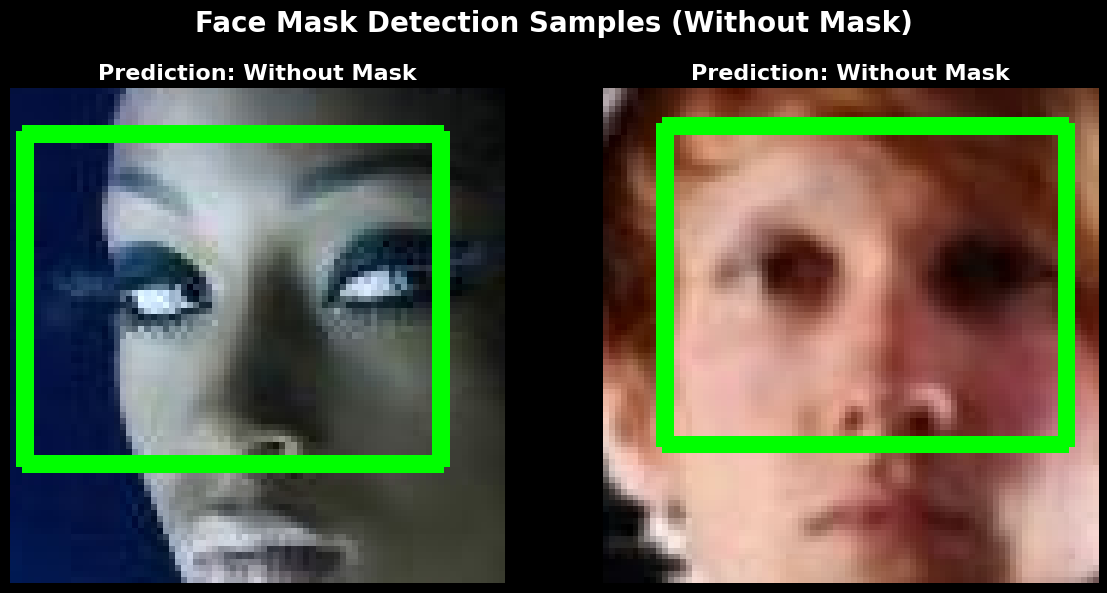

In [115]:
# Detect faces in the images
def detect_faces(image_path):
    # Load the pre-trained Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the image for detection
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    return faces, image  # Return both face boxes and the original image

# Paths to the sample images without masks
without_mask_path1 = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1028.png'
without_mask_path2 = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1161.png'

# Load and preprocess images
try:
    sample_without_mask_img1 = load_and_preprocess_image(without_mask_path1)
    sample_without_mask_img2 = load_and_preprocess_image(without_mask_path2)
except ValueError as e:
    print(e)
    exit()

# Make predictions
pred_without_mask1 = model.predict(sample_without_mask_img1)
pred_without_mask2 = model.predict(sample_without_mask_img2)

# Interpret predictions
class_names = ['With Mask', 'Without Mask']
pred_without_mask_class1 = class_names[np.argmax(pred_without_mask1)]
pred_without_mask_class2 = class_names[np.argmax(pred_without_mask2)]

# Detect faces in the images and get the original images
faces_img1, original_img1 = detect_faces(without_mask_path1)
faces_img2, original_img2 = detect_faces(without_mask_path2)

# Create a figure for displaying images and predictions
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')

# Display images with predictions and bounding boxes
display_image_with_predictions(original_img1, f"Prediction: {pred_without_mask_class1}", axs[0], faces_img1)
display_image_with_predictions(original_img2, f"Prediction: {pred_without_mask_class2}", axs[1], faces_img2)

# Adjust layout
plt.suptitle('Face Mask Detection Samples (Without Mask)', color='white', fontsize=20, fontweight='bold')  # Main title
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


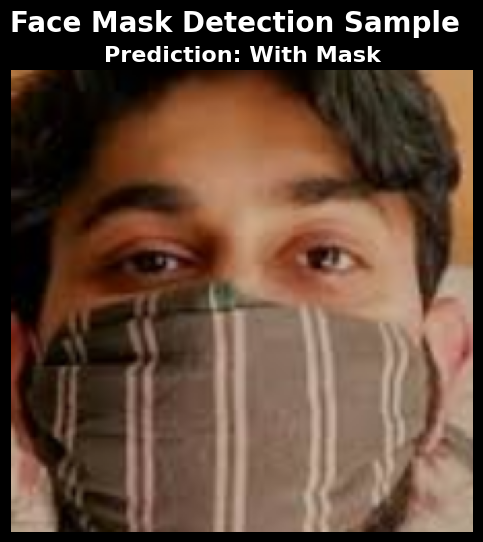

In [145]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image function
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the path.")
    
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    
    # Normalize the image to the range [0, 1]
    image = image.astype('float32') / 255.0
    
    # Expand dimensions to fit model input
    image = np.expand_dims(image, axis=0)  # Shape becomes (1, height, width, channels)

    return image

# Function to display image with bounding boxes and predictions
def display_image_with_predictions(image, title, ax, mask_present):
    """
    Display the image with a title and a bounding box if a mask is present.
    
    Parameters:
    - image: numpy array, image to display
    - title: str, title of the image
    - ax: matplotlib axis object
    - mask_present: bool, indicates if a mask is present
    """
    # Convert the image back to the original format for displaying
    original_image = cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Draw bounding box if a mask is present
    if mask_present:
        cv2.rectangle(original_image, (10, 10), (210, 210), (0, 255, 0), 2)  # Example bounding box

    ax.imshow(original_image)  # Display the image
    ax.set_title(title, color='white', fontsize=16, fontweight='bold')
    ax.axis('off')  # Hide axes

# Function to detect if a mask is present
def is_mask_present(prediction):
    return np.argmax(prediction) == 0# Assuming index 1 is 'With Mask'

# Path to the sample image
mask_image_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1175.png'

# Load and preprocess the image
try:
    sample_mask_img = load_and_preprocess_image(mask_image_path)
except ValueError as e:
    print(e)
    exit()

# Make prediction
pred_mask = model.predict(sample_mask_img)

# Interpret prediction
# Interpret prediction
class_names = ['Without Mask', 'With Mask']
pred_mask_class = class_names[np.argmax(pred_mask)]

# Check if mask is present
mask_present = is_mask_present(pred_mask)

# Create a figure for displaying the image and prediction
fig, ax = plt.subplots(figsize=(6, 6), facecolor='black')

# Display image with prediction
display_image_with_predictions(sample_mask_img, f"\nPrediction: {pred_mask_class}", ax, mask_present)

# Adjust layout
plt.suptitle('Face Mask Detection Sample', color='white', fontsize=20, fontweight='bold')  # Main title

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


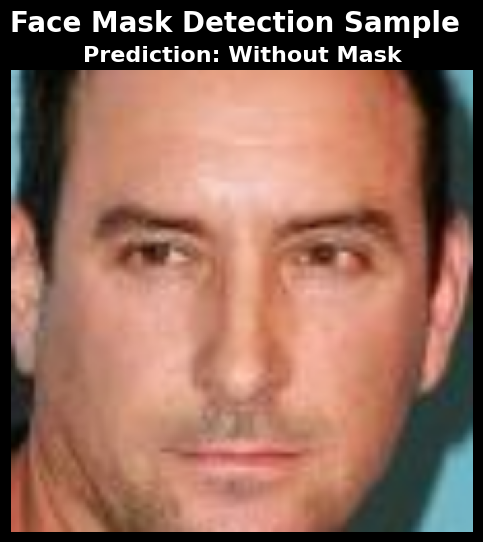

In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image function
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the path.")
    
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    
    # Normalize the image to the range [0, 1]
    image = image.astype('float32') / 255.0
    
    # Expand dimensions to fit model input
    image = np.expand_dims(image, axis=0)  # Shape becomes (1, height, width, channels)

    return image

# Function to display image with bounding boxes and predictions
def display_image_with_predictions(image, title, ax, mask_present):
    """
    Display the image with a title and a bounding box if a mask is present.
    
    Parameters:
    - image: numpy array, image to display
    - title: str, title of the image
    - ax: matplotlib axis object
    - mask_present: bool, indicates if a mask is present
    """
    # Convert the image back to the original format for displaying
    original_image = cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Draw bounding box if a mask is present
    if mask_present:
        cv2.rectangle(original_image, (10, 10), (210, 210), (0, 255, 0), 2)  # Example bounding box

    ax.imshow(original_image)  # Display the image
    ax.set_title(title, color='white', fontsize=16, fontweight='bold')
    ax.axis('off')  # Hide axes

# Function to detect if a mask is present
def is_mask_present(prediction):
    return np.argmax(prediction) == 0# Assuming index 1 is 'With Mask'

# Path to the sample image
mask_image_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1160.png'

# Load and preprocess the image
try:
    sample_mask_img = load_and_preprocess_image(mask_image_path)
except ValueError as e:
    print(e)
    exit()

# Make prediction
pred_mask = model.predict(sample_mask_img)

# Interpret prediction
# Interpret prediction
class_names = ['With Mask', 'Without Mask']
pred_mask_class = class_names[np.argmax(pred_mask)]

# Check if mask is present
mask_present = is_mask_present(pred_mask)

# Create a figure for displaying the image and prediction
fig, ax = plt.subplots(figsize=(6, 6), facecolor='black')

# Display image with prediction
display_image_with_predictions(sample_mask_img, f"\nPrediction: {pred_mask_class}", ax, mask_present)

# Adjust layout
plt.suptitle('Face Mask Detection Sample', color='white', fontsize=20, fontweight='bold')  # Main title

# Show the plot
plt.show()



# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:red;">History Plot</p>